In [159]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [160]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [161]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
PassengerId,1,2,3,4,5,6,7,8,9,10
Survived,0,1,1,1,0,0,0,0,1,1
Pclass,3,1,3,1,3,3,1,3,3,2
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry","Moran, Mr. James","McCarthy, Mr. Timothy J","Palsson, Master. Gosta Leonard","Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)","Nasser, Mrs. Nicholas (Adele Achem)"
Sex,male,female,female,female,male,male,male,male,female,female
Age,22.0,38.0,26.0,35.0,35.0,NaN,54.0,2.0,27.0,14.0
SibSp,1,1,0,1,0,0,0,3,0,1
Parch,0,0,0,0,0,0,0,1,2,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450,330877,17463,349909,347742,237736
Fare,7.25,71.2833,7.925,53.1,8.05,8.4583,51.8625,21.075,11.1333,30.0708


Checking Null Values

In [162]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Filling Null values with the help of Simple Imputer

In [163]:
from sklearn.impute import SimpleImputer
SI = SimpleImputer()
df['Age']= SI.fit_transform(df['Age'].values.reshape(-1,1))

In [164]:
SI = SimpleImputer(strategy = 'most_frequent')
df['Cabin'] = SI.fit_transform(df['Cabin'].values.reshape(-1,1))

In [165]:
SI = SimpleImputer(strategy = 'most_frequent')
df['Embarked'] = SI.fit_transform(df['Embarked'].values.reshape(-1,1))

In [166]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Changing the Object DataType into integer or Float by using Label Encoder

In [168]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()
I= ['Name','Sex','Ticket','Cabin','Embarked']
for i in I:
    df[i]= lr.fit_transform(df[i])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.000000,1,0,523,7.2500,47,2
1,2,1,1,190,0,38.000000,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.000000,0,0,669,7.9250,47,2
3,4,1,1,272,0,35.000000,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.000000,0,0,472,8.0500,47,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.000000,0,0,101,13.0000,47,2
887,888,1,1,303,0,19.000000,0,0,14,30.0000,30,2
888,889,0,3,413,0,29.699118,1,2,675,23.4500,47,2
889,890,1,1,81,1,26.000000,0,0,8,30.0000,60,0


All values are int & Float type

In [169]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name             int32
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Ticket           int32
Fare           float64
Cabin            int32
Embarked         int32
dtype: object

In [170]:
df.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,445.000000,0.647587,29.699118,0.523008,0.381594,338.528620,32.204208,53.639731,1.536476
std,257.353842,0.486592,0.836071,257.353842,0.477990,13.002015,1.102743,0.806057,200.850657,49.693429,23.568293,0.791503
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,222.500000,0.000000,22.000000,0.000000,0.000000,158.500000,7.910400,47.000000,1.000000
50%,446.000000,0.000000,3.000000,445.000000,1.000000,29.699118,0.000000,0.000000,337.000000,14.454200,47.000000,2.000000
75%,668.500000,1.000000,3.000000,667.500000,1.000000,35.000000,1.000000,0.000000,519.500000,31.000000,47.000000,2.000000
max,891.000000,1.000000,3.000000,890.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,146.000000,2.000000


As per describe data because the difference between min,25%,50%,75% & max is not equal. So skewness present in data.

0    549
1    342
Name: Survived, dtype: int64

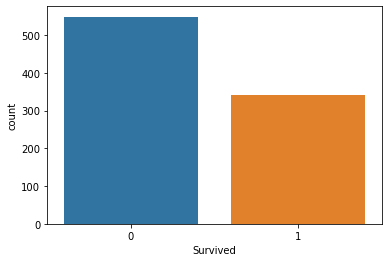

In [171]:
    sns.countplot(x= "Survived", data= df)
    df['Survived'].value_counts()

As per above observations the total number of survived passanger are 342 & Not survived are 549

3    491
1    216
2    184
Name: Pclass, dtype: int64

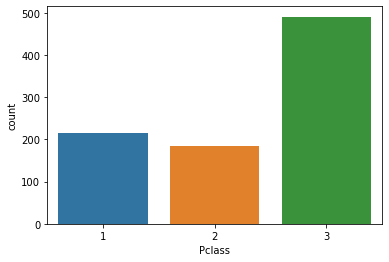

In [172]:
sns.countplot(x= 'Pclass', data= df)
df['Pclass'].value_counts()

As per above observations the total number of Class-1 passangers are 216, Class-2 are 184 & Class-3 are 491

1    577
0    314
Name: Sex, dtype: int64

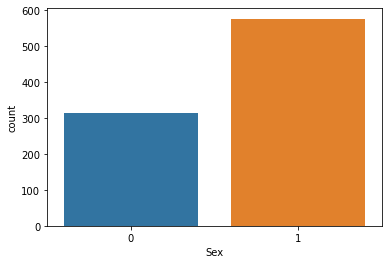

In [173]:
sns.countplot(x= 'Sex', data= df)
df['Sex'].value_counts()

As per above observations the total number of Male passangers are 577 & Female Passangers are 314

2    646
0    168
1     77
Name: Embarked, dtype: int64

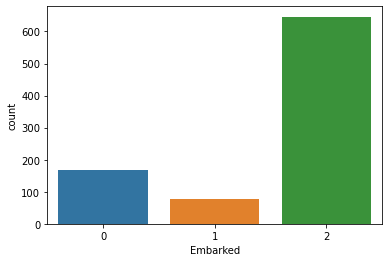

In [174]:
sns.countplot(x= 'Embarked', data= df)
df['Embarked'].value_counts()

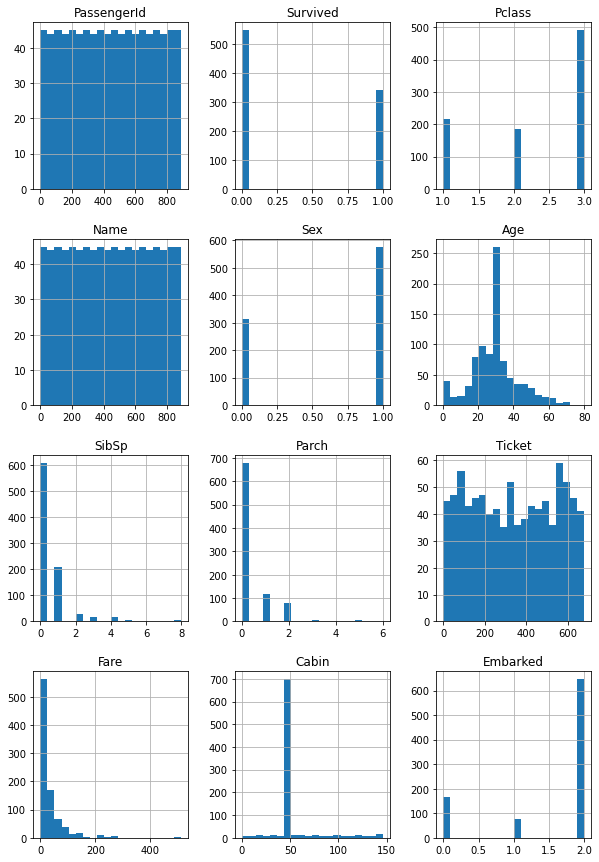

In [175]:
df.hist(bins= 20, figsize= (10,15))
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

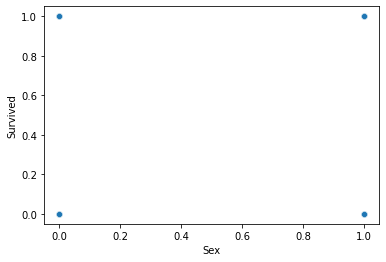

In [176]:
sns.scatterplot(x='Sex', y='Survived', data=df)

<AxesSubplot:xlabel='Age', ylabel='Survived'>

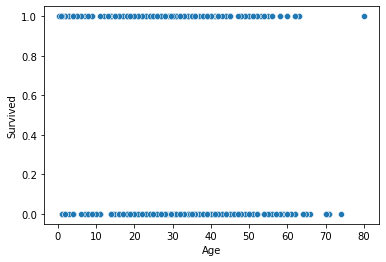

In [177]:
sns.scatterplot(x='Age', y='Survived', data=df)

We can see Age is equally distributed in range 12 to 65

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

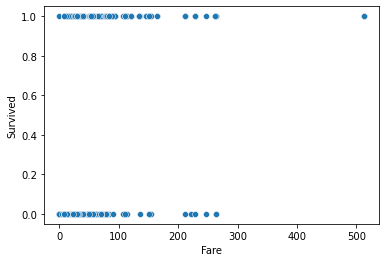

In [178]:
sns.scatterplot(x='Fare', y='Survived', data=df)

We can see Age is equally distributed in range 1 to 100

In [179]:
df.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,0.042939,0.033207,-0.057527,-0.001652,-0.056554,0.012658,-0.018086,0.013128
Survived,-0.005007,1.000000,-0.338481,-0.057343,-0.543351,-0.069809,-0.035322,0.081629,-0.164549,0.257307,0.175690,-0.167675
Pclass,-0.035144,-0.338481,1.000000,0.052831,0.131900,-0.331339,0.083081,0.018443,0.319869,-0.549500,-0.248495,0.162098
Name,-0.038559,-0.057343,0.052831,1.000000,0.020314,0.057466,-0.017230,-0.049105,0.047348,-0.049173,0.034129,-0.006117
Sex,0.042939,-0.543351,0.131900,0.020314,1.000000,0.084153,-0.114631,-0.245489,0.059372,-0.182333,-0.102643,0.108262
Age,0.033207,-0.069809,-0.331339,0.057466,0.084153,1.000000,-0.232625,-0.179191,-0.068848,0.091566,0.056011,-0.026749
SibSp,-0.057527,-0.035322,0.083081,-0.017230,-0.114631,-0.232625,1.000000,0.414838,0.079461,0.159651,-0.005539,0.068230
Parch,-0.001652,0.081629,0.018443,-0.049105,-0.245489,-0.179191,0.414838,1.000000,0.020003,0.216225,0.022682,0.039798
Ticket,-0.056554,-0.164549,0.319869,0.047348,0.059372,-0.068848,0.079461,0.020003,1.000000,-0.013885,-0.072200,-0.001729
Fare,0.012658,0.257307,-0.549500,-0.049173,-0.182333,0.091566,0.159651,0.216225,-0.013885,1.000000,0.090516,-0.224719


In [180]:
df.corr()['Survived'].sort_values()

Sex           -0.543351
Pclass        -0.338481
Embarked      -0.167675
Ticket        -0.164549
Age           -0.069809
Name          -0.057343
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Cabin          0.175690
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

<AxesSubplot:>

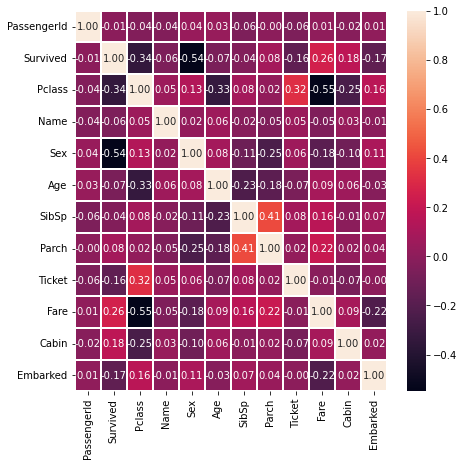

In [181]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), annot= True,linewidth=0.1, linecolor= 'white', fmt= '0.2f')

Fare & Cabin are highly cocrelated with Target val=riable and Sex & Pclass are negatively coorelated with Tarhet varible

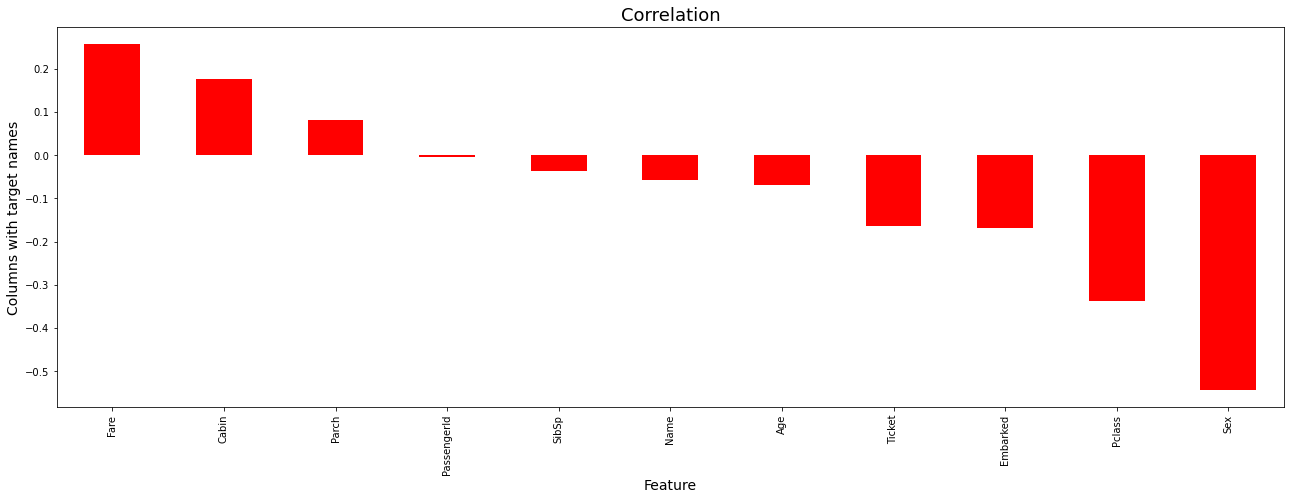

In [182]:
plt.figure(figsize=(22,7))
df.corr()['Survived'].sort_values(ascending= False).drop(['Survived']).plot(kind='bar', color='red')
plt.xlabel('Feature', fontsize=14)
plt.ylabel("Columns with target names", fontsize=14)
plt.title('Correlation', fontsize=18)
plt.show()

Checking the columns which are positive and negative coorelated with target column

Slipsp,Name,Age,Ticket,Embarked.Pclass,Sex are negatively coorelated with target varible

In [183]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Name           0.000000
Sex           -0.618921
Age            0.434488
SibSp          3.695352
Parch          2.749117
Ticket         0.000246
Fare           4.787317
Cabin          2.268926
Embarked      -1.264823
dtype: float64

Keeping +/-0.5 as skewness range, Below are the columns are not lie within the range

SibSP-Catagorical
Parch-Catagorical
Fare- Float
Cabin- Catagorical
Embarked- Catagorical

# Outlier Check

Checking the Outliers on the int and float type of columns

<AxesSubplot:>

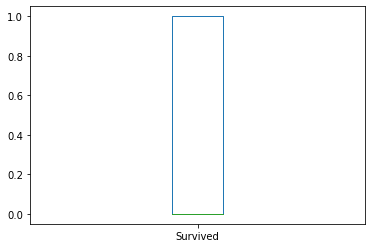

In [184]:
df['Survived'].plot.box()

<AxesSubplot:>

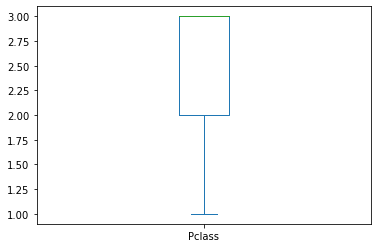

In [185]:
df['Pclass'].plot.box()

<AxesSubplot:>

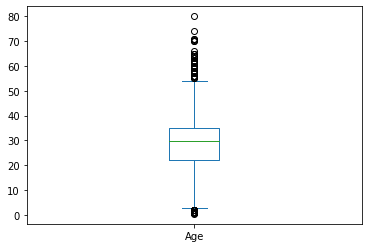

In [186]:
df['Age'].plot.box()

<AxesSubplot:>

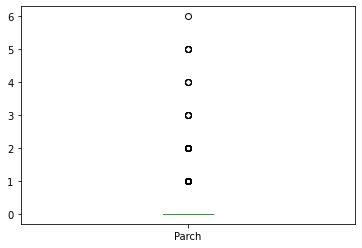

In [187]:
df['Parch'].plot.box()

<AxesSubplot:>

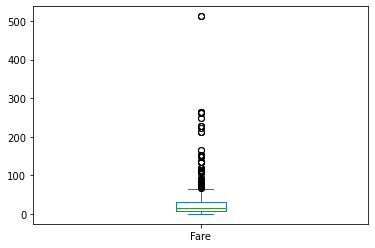

In [188]:
df['Fare'].plot.box()

# Consider the Outlier Removal

In [189]:
df.shape

(891, 12)

In [190]:
from scipy.stats import zscore
import numpy as np
z= np.abs(zscore(df))
threshold= 3
np.where(z>3)

(array([  6,  10,  13,  16,  25,  27,  50,  59,  66,  68,  71,  75,  86,
         88,  96, 116, 118, 119, 128, 148, 159, 164, 167, 171, 180, 182,
        183, 193, 201, 205, 233, 251, 258, 261, 262, 266, 278, 299, 309,
        311, 324, 337, 339, 340, 341, 345, 360, 370, 377, 380, 386, 394,
        434, 437, 438, 438, 456, 462, 480, 493, 516, 527, 541, 542, 557,
        558, 567, 577, 585, 610, 618, 630, 638, 662, 672, 678, 679, 683,
        686, 689, 699, 700, 715, 716, 724, 730, 736, 737, 742, 745, 772,
        774, 776, 779, 787, 792, 809, 813, 824, 835, 846, 850, 851, 858,
        863, 885], dtype=int64),
 array([10, 10,  7,  6,  7,  9,  6,  6, 10,  6,  6, 10,  7,  9,  5,  5,  9,
         6, 10, 10,  6,  6,  7,  6,  6,  6, 10, 10,  6, 10,  6, 10,  9,  6,
        10,  6,  6,  9, 10,  9,  6, 10, 10, 10,  9, 10,  7, 10,  9,  9,  6,
        10, 10,  7,  7,  9, 10, 10,  6,  5, 10,  9,  6,  6,  9, 10,  7, 10,
        10,  7, 10,  5,  7, 10,  5,  7,  9,  6,  6,  9, 10,  9, 10,  9, 10,
   

In [191]:
df_new=df[(z<3).all(axis=1)]
df_new

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.000000,1,0,523,7.2500,47,2
1,2,1,1,190,0,38.000000,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.000000,0,0,669,7.9250,47,2
3,4,1,1,272,0,35.000000,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.000000,0,0,472,8.0500,47,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.000000,0,0,101,13.0000,47,2
887,888,1,1,303,0,19.000000,0,0,14,30.0000,30,2
888,889,0,3,413,0,29.699118,1,2,675,23.4500,47,2
889,890,1,1,81,1,26.000000,0,0,8,30.0000,60,0


In [192]:
df_new.shape

(786, 12)

In [193]:
data_loss= ((891-786)/891)*100
data_loss

11.784511784511785

Since the Parch,Pclass is catagorical type and Fare and Age having different values so we are not removing outliers

# Saperating the Feature & Targets

In [194]:
feature = df.drop('Survived', axis=1)
target = df['Survived']

Removing skewness from data

In [195]:
from sklearn.preprocessing import power_transform
feature= power_transform(feature,method='yeo-johnson')

In [196]:
feature

array([[-2.14814111,  0.86397329, -1.351096  , ..., -0.87882001,
        -0.19397367,  0.61041095],
       [-2.13183003, -1.45912855, -0.93828827, ...,  1.33665056,
         1.25278617, -1.78052001],
       [-2.117043  ,  0.86397329, -0.24765444, ..., -0.79006485,
        -0.19397367,  0.61041095],
       ...,
       [ 1.55071925,  0.86397329, -0.01877308, ...,  0.28888536,
        -0.19397367,  0.61041095],
       [ 1.55371741, -1.45912855, -1.50551816, ...,  0.52790578,
         0.42291929, -1.78052001],
       [ 1.5567146 ,  0.86397329, -0.80116669, ..., -0.81234947,
        -0.19397367, -1.23633916]])

In [197]:
pd.DataFrame(feature).skew()

0    -0.283201
1    -0.441438
2    -0.288132
3    -0.618921
4     0.064420
5     0.808608
6     1.228795
7    -0.299695
8    -0.040329
9     0.316911
10   -1.064527
dtype: float64

# from Scaling data using MIn Max Scaler

In [198]:
from sklearn .preprocessing import MinMaxScaler
msn = MinMaxScaler()
feature= msn.fit_transform(feature)

In [199]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# importing Model

In [200]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

In [201]:
xtrain,xtest,ytrain,ytest = train_test_split(feature,target,test_size= .22, random_state=42)
estimator = []
estimator.append(('LR',LogisticRegression()))
estimator.append(('KNN',KNeighborsClassifier()))
estimator.append(('SV',SVC()))
estimator.append(('DT',DecisionTreeClassifier()))
estimator.append(('RF',RandomForestClassifier(n_estimators=100, random_state=42)))
estimator

[('LR', LogisticRegression()),
 ('KNN', KNeighborsClassifier()),
 ('SV', SVC()),
 ('DT', DecisionTreeClassifier()),
 ('RF', RandomForestClassifier(random_state=42))]

In [202]:
xtrain.shape

(694, 11)

In [203]:
ytrain.shape

(694,)

In [204]:
xtest.shape

(197, 11)

In [205]:
ytest.shape

(197,)

In [206]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [207]:
vot_hard = VotingClassifier(estimators= estimator, voting= 'hard')
vot_hard.fit(xtrain,ytrain)
pred = vot_hard.predict(xtest)
print("Accuracy Score", accuracy_score(ytest,pred))
print("Confusion Metrics", confusion_matrix(ytest,pred))
print("Classification_report", classification_report(ytest,pred))

Accuracy Score 0.8121827411167513
Confusion Metrics [[105  12]
 [ 25  55]]
Classification_report               precision    recall  f1-score   support

           0       0.81      0.90      0.85       117
           1       0.82      0.69      0.75        80

    accuracy                           0.81       197
   macro avg       0.81      0.79      0.80       197
weighted avg       0.81      0.81      0.81       197



In [208]:
LR = LogisticRegression()
KNN = KNeighborsClassifier()
SV = SVC()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier(n_estimators=100, random_state=42)
mod = [LR, KNN, SV, DT, RF]

mod

[LogisticRegression(),
 KNeighborsClassifier(),
 SVC(),
 DecisionTreeClassifier(),
 RandomForestClassifier(random_state=42)]

In [209]:
for i in mod:
    feature_train,feature_test,target_train,target_test = train_test_split(feature,target,test_size= .22, random_state=42)
    i.fit(feature_train,target_train)
    pred = i.predict(feature_test)
    print("Accuracy Score", accuracy_score(target_test,pred))
    print("Confusion Metrics", confusion_matrix(target_test,pred))
    print("Classification_report", classification_report(target_test,pred))

Accuracy Score 0.8020304568527918
Confusion Metrics [[99 18]
 [21 59]]
Classification_report               precision    recall  f1-score   support

           0       0.82      0.85      0.84       117
           1       0.77      0.74      0.75        80

    accuracy                           0.80       197
   macro avg       0.80      0.79      0.79       197
weighted avg       0.80      0.80      0.80       197

Accuracy Score 0.8274111675126904
Confusion Metrics [[106  11]
 [ 23  57]]
Classification_report               precision    recall  f1-score   support

           0       0.82      0.91      0.86       117
           1       0.84      0.71      0.77        80

    accuracy                           0.83       197
   macro avg       0.83      0.81      0.82       197
weighted avg       0.83      0.83      0.82       197

Accuracy Score 0.8071065989847716
Confusion Metrics [[106  11]
 [ 27  53]]
Classification_report               precision    recall  f1-score   support

    

As per all the above classification techniques fandom forest gives the better accuracy out of all classifiers

# Now we can check with various parameters using Grid search CV

In [210]:
from sklearn.model_selection import GridSearchCV

In [211]:
model = RandomForestClassifier()

In [217]:
param_grid = {'n_estimators': [200, 500],'max_features': ['auto', 'sqrt', 'log2'],'max_depth' : [4,5,6,7,8],'criterion' :['gini', 'entropy']}

In [219]:
grid = GridSearchCV(estimator = model, param_grid = param_grid)

In [222]:
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [225]:
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.8328224377020124
RandomForestClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       n_estimators=500)
{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 500}


As per Grid Search CV we found the best accuracy when criterion='entropy', max_depth=5, max_features='sqrt',n_estimators=500

In [226]:
RF = RandomForestClassifier(criterion='entropy', max_depth=5, max_features='sqrt',n_estimators=500)

In [231]:
RF.fit(feature_train,target_train)
pred = RF.predict(feature_test)
print("Accuracy Score", accuracy_score(target_test,pred))
print("Confusion Metrics", confusion_matrix(target_test,pred))
print("Classification_report", classification_report(target_test,pred))

Accuracy Score 0.8223350253807107
Confusion Metrics [[108   9]
 [ 26  54]]
Classification_report               precision    recall  f1-score   support

           0       0.81      0.92      0.86       117
           1       0.86      0.68      0.76        80

    accuracy                           0.82       197
   macro avg       0.83      0.80      0.81       197
weighted avg       0.83      0.82      0.82       197



# Cross validation score for Random Forest Classifier

In [237]:
from sklearn.model_selection import cross_val_score
for i in range (2,10):
    score= cross_val_score(RF,feature,target,cv=i)
    print("At cv value at", i,"the cv score is",score)
    print(score.mean())
    print(score.std())

At cv value at 2 the cv score is [0.76233184 0.80224719]
0.7822895147881292
0.01995767622310679
At cv value at 3 the cv score is [0.78787879 0.82154882 0.81481481]
0.8080808080808081
0.014547117168143364
At cv value at 4 the cv score is [0.77578475 0.85201794 0.8161435  0.81981982]
0.8159415020401568
0.027060837896478725
At cv value at 5 the cv score is [0.78212291 0.81460674 0.86516854 0.78651685 0.84269663]
0.8182223338145753
0.0320137972371459
At cv value at 6 the cv score is [0.77852349 0.81879195 0.87919463 0.81081081 0.80405405 0.83108108]
0.8204093355100066
0.03078490977689848
At cv value at 7 the cv score is [0.8046875  0.8046875  0.8503937  0.8503937  0.83464567 0.77952756
 0.83464567]
0.8227116141732286
0.024876951988470015
At cv value at 8 the cv score is [0.77678571 0.75892857 0.83035714 0.87387387 0.84684685 0.77477477
 0.8018018  0.83783784]
0.8126508204633205
0.03806279698024349
At cv value at 9 the cv score is [0.80808081 0.7979798  0.78787879 0.88888889 0.87878788 0.76

# AUC ROC Curve

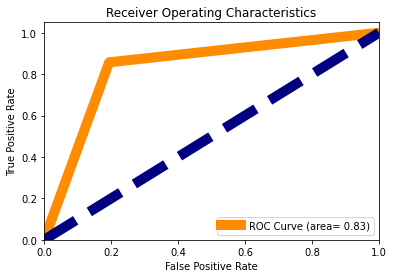

In [238]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds = roc_curve(pred, target_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr, tpr, color = "darkorange", lw =10, label ="ROC Curve (area= %0.2f)" %roc_auc)
plt.plot([0,1], [0,1], color= 'navy', lw =10, linestyle ='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristics")
plt.legend(loc ="lower right")
plt.show()

# Model Saving

In [239]:
import pickle
filename = "titanic_train.pkl"
pickle.dump(RF, open(filename, 'wb'))

# Conclusion

In [240]:
import numpy as np
a = np.array(target_test)
predicted =np.array(RF.predict(feature_train))
df_com= pd.DataFrame({"Original":a, "Predicted":pred}, index =range(len(a)))
df_com

,Original,Predicted
0,1,0
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
192,0,0
193,1,0
194,1,1
195,1,1
